# Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt

np.random.seed(2)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [3]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [4]:
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Extracting the dataset

I have extracted the dataset and read it

In [5]:
# Loaded the fraud dataset from the specified CSV file path into a dataframe
fraud_dataset = pd.read_csv("C:/Users/CHITRADIP/OneDrive/Desktop/Dissertation/Dataset/creditcard.csv")

In [6]:
# In order to get an overview of the dataset, displayed the first few rows of the dataset
fraud_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Dataset Analysis

I calculated the length of the total dataset

In [7]:
# Calculated and displayed the total length (size) of the dataset
len(fraud_dataset)

284807

# Gathering Statistical Analysis

I gathered a statistical information of the various factors of the dataset

In [8]:
# Generated the descriptive statistics of the dataset for better information. This contains count, mean, standard deviation, minimum value, 25%, 50%, 75% and maximum values of each column 
fraud_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


I gathered information about the type of values of the various factors

In [9]:
# Printed and displayed a summary of the dataframe which includes the index dtypes and column dtypes, non-null values and the memory usage
fraud_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Null Value Evaluation

I displayed all the null values in my dataset to check weather I have any

In [10]:
# Calculated the number of missing values in each column of the dataset
fraud_dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

I don't have any null values in my dataset

In [11]:
# Tried to find out the maximum number of missing values in any column of my dataset
fraud_dataset.isnull().sum().max()

0

# Correlation Analysis

I analyzed the correlation of the various factors with the class fraudulent/non-fraudulent

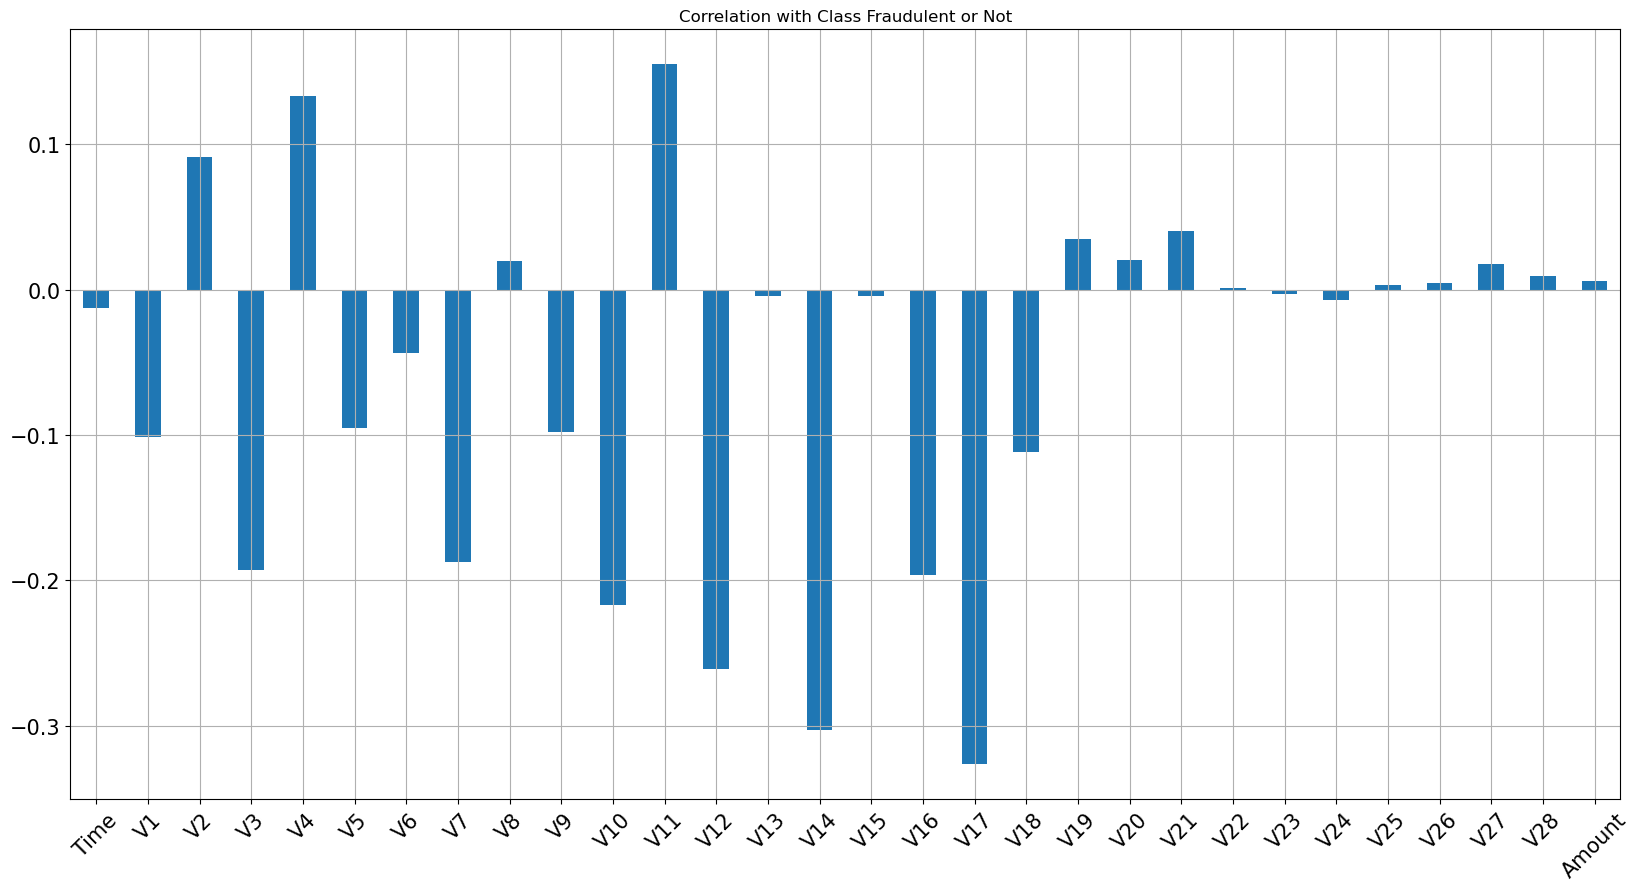

In [12]:
# Dropped the class column to focus on the other features for correlation analysis
data2 = fraud_dataset.drop(columns = ['Class'])

# Calculated the correlation of each feature with the Class column and plotted it as a bar chart
data2.corrwith(fraud_dataset.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15, # The size of the plot, title and fontsize for labels have been set
        rot = 45, grid = True) # The x-axis label has been rotated 45 degrees for the better readibility
# Displayed the plot
plt.show() 

# Histogram Analysis

I generated a histogram of all the columns in the dataset

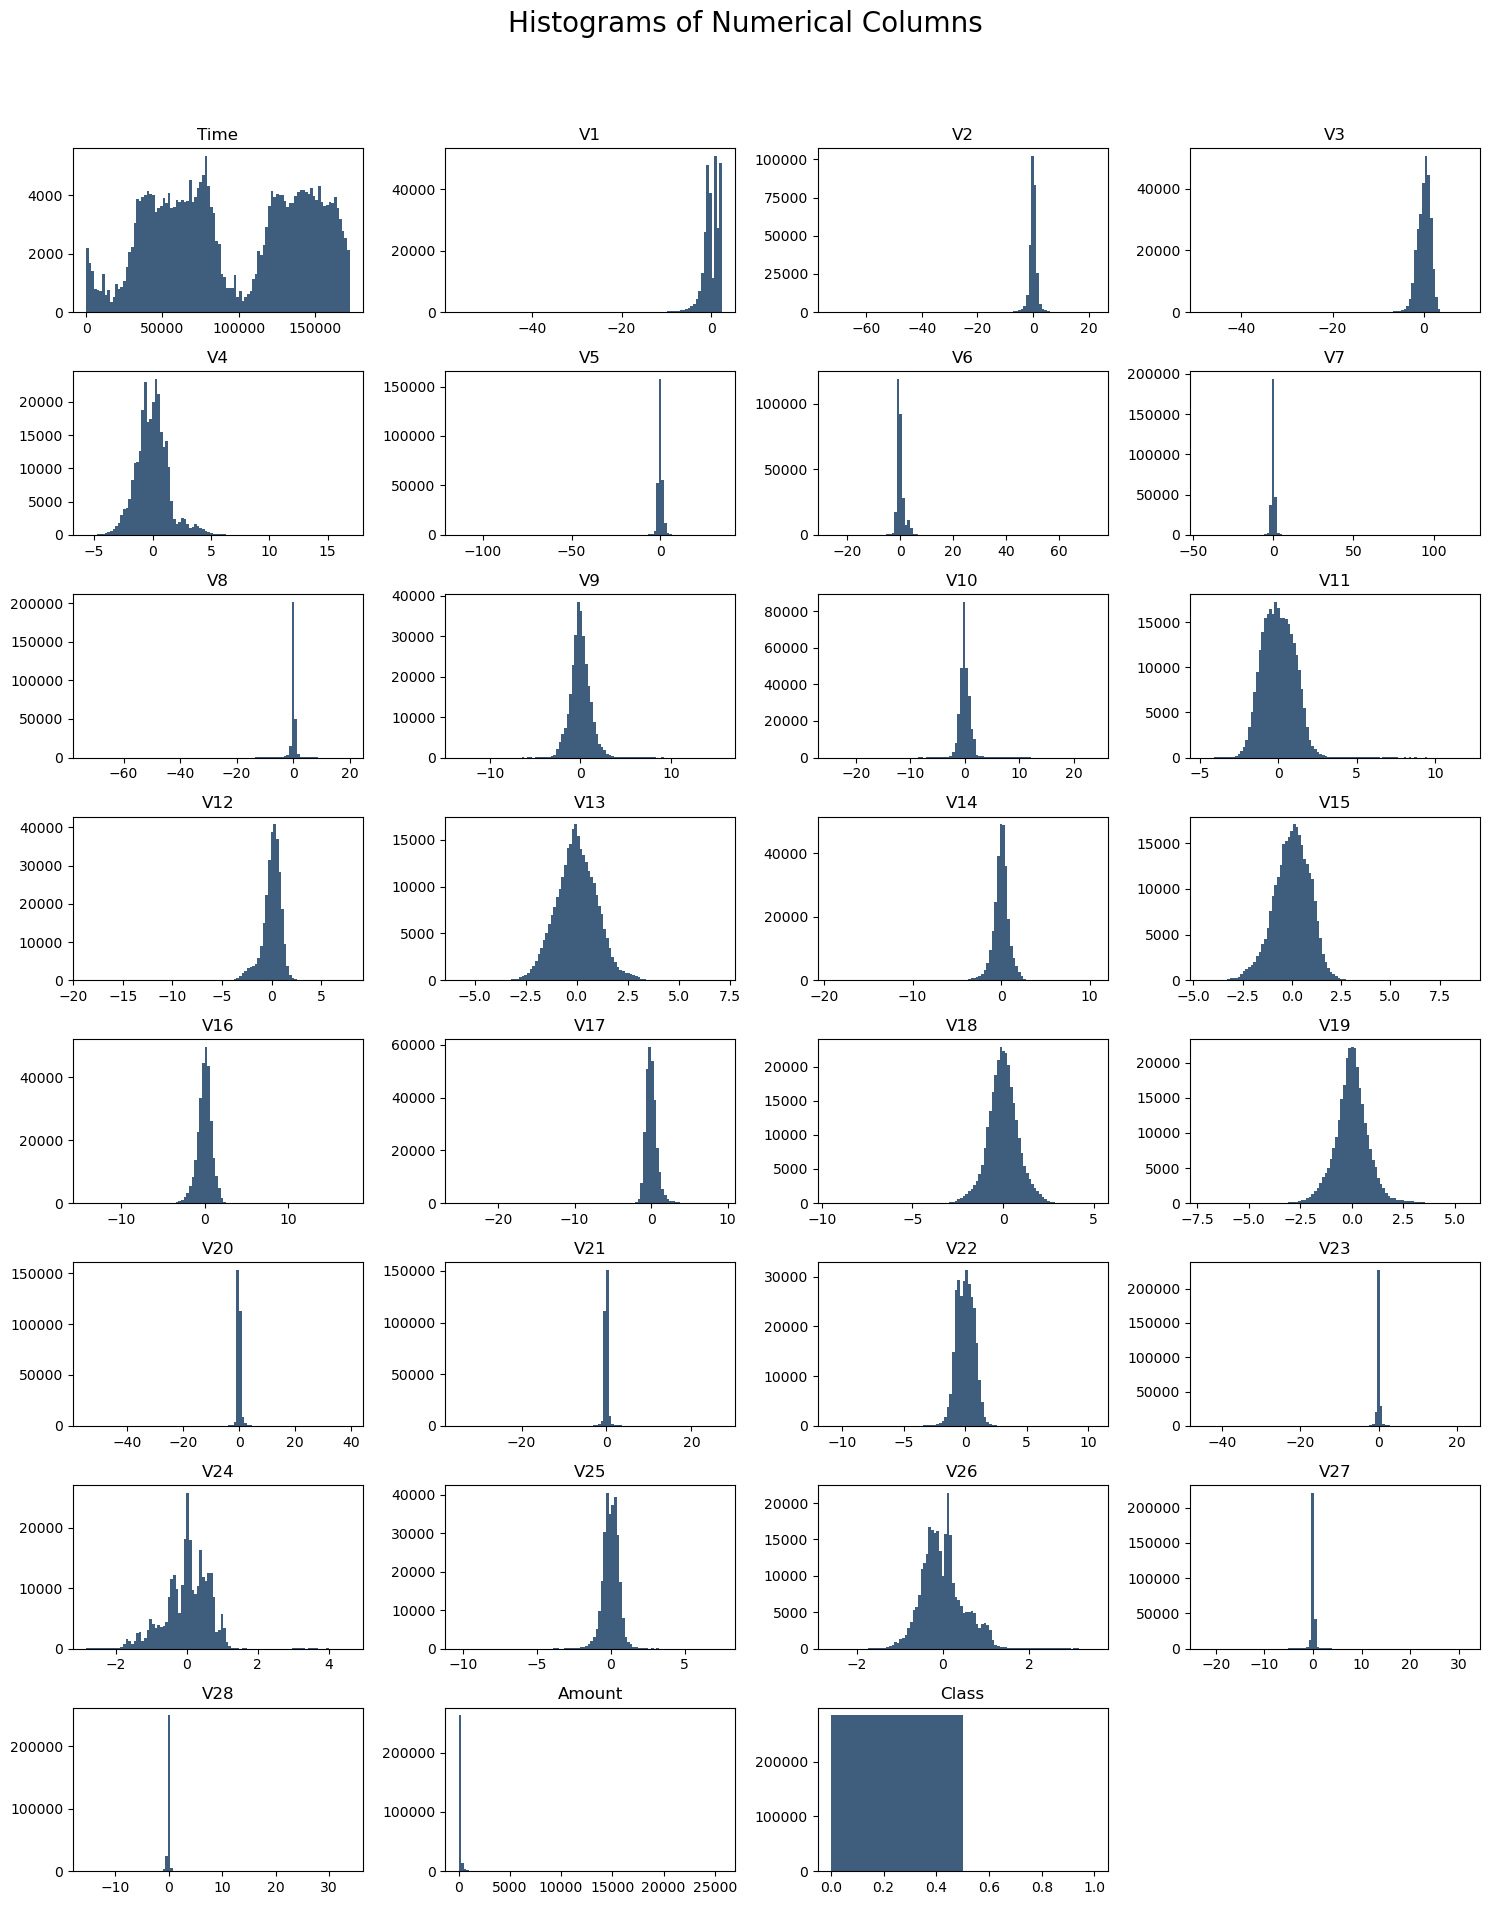

In [13]:
# Histogram Analysis
# A new figure with the specified size has been created
fig = plt.figure(figsize=(15, 20))

# The main title of the figure is set
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(fraud_dataset.shape[1]): # Iteration over each of the columns of the dataset is carried out
    plt.subplot(8, 4, i + 1) # A subplot for each of the columns is created
    f = plt.gca() # The current axis is retrieved
    f.set_title(fraud_dataset.columns.values[i]) # The title of the subplot will be the column name 

    vals = np.size(fraud_dataset.iloc[:, i].unique()) # To retrieve the number of unique values in the column
    if vals >= 100:
        vals = 100  # limit our bins to 100 maximum
    
    plt.hist(fraud_dataset.iloc[:, i], bins=vals, color='#3F5D7D') # A histogram of the columns is plotted keeping in mind of the specified bins and colour mentioned
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # In order to prevent overlap, the layout is adjusted

# Analysis of Time and Amount Columns

I generated seperate distribution plots for the amount and time columns in the dataset

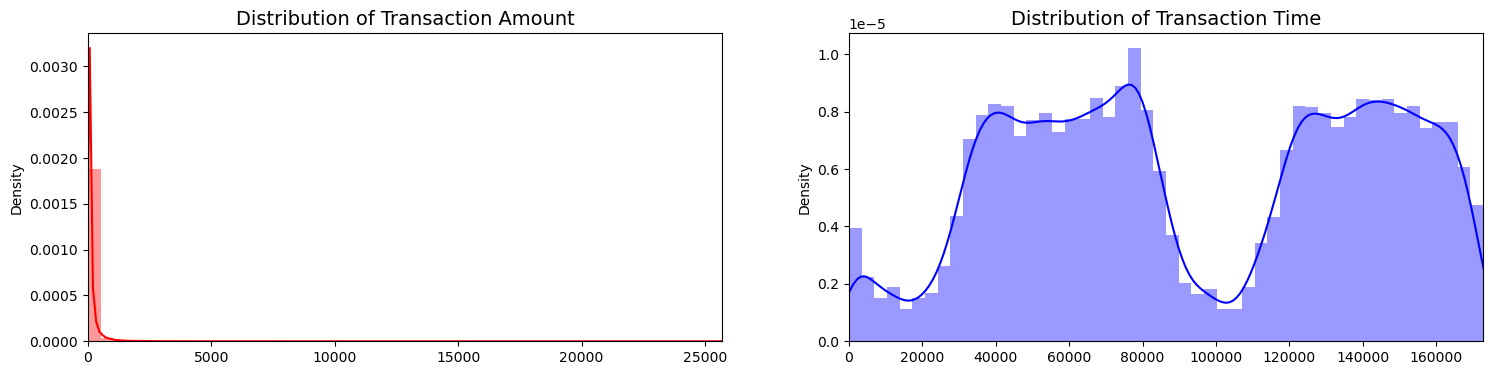

In [14]:
# A figure with the specified size is to be created
fig, ax = plt.subplots(1, 2, figsize=(18,4))

# The amount column values are extracted
amount_val = fraud_dataset['Amount'].values

# The time column values are extracted
time_val = fraud_dataset['Time'].values

# We plotted the distribution of transaction amounts
sns.distplot(amount_val, ax=ax[0], color='r') # A distribution plot for the amount column is created in the first subplot whose colour will be red
ax[0].set_title('Distribution of Transaction Amount', fontsize=14) # The title for the first subplot is set
ax[0].set_xlim([min(amount_val), max(amount_val)]) # The x-axis limits for the first subplot is set

# We plotted the distribution of times
sns.distplot(time_val, ax=ax[1], color='b') # To create a distribution plot for the time data in the second subplot whose colour will be blue
ax[1].set_title('Distribution of Transaction Time', fontsize=14) # The title of the second sub-plot is set
ax[1].set_xlim([min(time_val), max(time_val)]) # The x-axis limits of the second subplot is set 

# The figure is displayed
plt.show()

# Standardizing the Amount and Time Column

From the plots of time and amount, I realized that they are highly skewed and need to be scaled. I have done this by using the  RobustScaler function. The new columns have been named as scaled_amount and scaled_time. They have been incorporated in the beginning of the dataset. This will make the predictions more accurate when we use the machine learning algorithm.

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler() # Initialized a StandardScaler object
rob_scaler = RobustScaler() # Initialized a RobustScaler object

# Scaled the amount column by using RobustScaler. Added it as a new column called scaled_amount
fraud_dataset['scaled_amount'] = rob_scaler.fit_transform(fraud_dataset['Amount'].values.reshape(-1,1))

# Scaled the time column by using RobustScaler. Added it as a new column called scaled_time 
fraud_dataset['scaled_time'] = rob_scaler.fit_transform(fraud_dataset['Time'].values.reshape(-1,1))

# Finally dropped the original amount and time column from the dataset
fraud_dataset.drop(['Time','Amount'], axis=1, inplace=True)

In [16]:
scaled_amount = fraud_dataset['scaled_amount'] # The scaled_amount column in extracted
scaled_time = fraud_dataset['scaled_time'] # The scaled_time column is extracted

# The scaled_amount and scaled_time columns have been dropped from their current positions
fraud_dataset.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# The scaled_amount column has been inserted at the first position which is the 0th index
fraud_dataset.insert(0, 'scaled_amount', scaled_amount)

# The scaled_time column has been inserted at the second position which is the 1st index
fraud_dataset.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

fraud_dataset.head() # To verify the changes the first few rows of the dataset in displayed

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Duplicate Handling

This part of the code is used to check if there are any duplicates in the fraud_dataset. Since it had duplicates the output came as true.

In [17]:
# To check for any rows which have duplicates in the dataset 
fraud_dataset.duplicated().any()

True

In this part of the code I have removed the duplicates from the fraud_dataset

In [18]:
# To drop any duplicate rows if present in the dataset
fraud_dataset = fraud_dataset.drop_duplicates()

After removing the duplicates I observe the shape of the fraud_dataset to know how many rows and columns it has

In [19]:
# To get the dimensions of the data set which include the number of rows and columns
fraud_dataset.shape

(283726, 31)

The class variable is the one in our fraud_dataset which tells us weather a transaction is fraudulent or non-fraudulent. If it is 0 the transaction is non-fraudulent and if it is 1 the transaction is fraudulent. In this part of the code I have calculated and shown how many transactions are fraudulent and how many are non-fraudulent.

In [20]:
# To retrieve the count of each unique value in the class column
fraud_dataset['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

# Addressing the class imbalance with Undersampling Technique

In this sampling technique we will be adressing the class imbalance issue by making the fraudulent and non-fraudulent transactions equal. This is done by deleting some of the non-fraudulent transactions so that it becomes equal to the number of fraudulent transactions. The ratio of fraudulent and non-fraudulent transactions becomes 1:1 after undersampling.

This part of the code is used to separate the original dataframe into two separate dataframes. One contains non-fraudulent transactions with class 0 and the other contains fraudulent transactions with class 1.

In [21]:
# To separate the dataset into two subsets. One will contain the normal transactions and the other will contain the fraudulent transactions

# The subset of data which only contains the non-fraudulent transactions i.e., where the class is 0
normal = fraud_dataset[fraud_dataset['Class']==0]

# The subset of data which only contains the fraudulent transactions i.e., where the class is 1
fraud = fraud_dataset[fraud_dataset['Class']==1]

This part of the code is used to find the shape of the normal dataframe which contains all the non-fraudulent transactions.

In [22]:
# To calculate the dimensions of the subset normal
normal.shape

(283253, 31)

This part of the code is used to find the shape of the fraud dataframe which contains all the fraudulent transactions.

In [23]:
# To get the dimensions of the subset fraud
fraud.shape

(473, 31)

This part of the code is used to select randomly 473 datapoints from the non-fraudulent dataframe so that it can be balanced with the fraudulent dataframe.

In [24]:
# To sample randomly 473 rows from the normal subset and create another subset normal_sample
normal_sample = normal.sample(n=473)

This part of the code is used to find the shape of the normal dataframe after undersampling which tells us that now its has 473 records similar to the fraudulent set

In [25]:
# To get the dimensions of the normal_sample subset
normal_sample.shape

(473, 31)

We create a new dataframe which is formed by concatenating the normal_sample containing 473 randomly selected non-fraud data and the fraud set.

In [26]:
# To concatenate the normal_sample subset along with the fraud subset to create a new_fraud_dataset which is balanced and has equal number of fraud and non-fraud transactions
new_fraud_dataset = pd.concat([normal_sample,fraud], ignore_index=True)

The thus formed new dataframe also called new_fraud_dataset is shown as below in this part of the code.

In [27]:
# The first few rows of the new_fraud_dataset is displayed
new_fraud_dataset.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.048138,0.596706,-1.200325,0.401519,1.103673,-1.342776,0.491001,-0.170952,1.299418,-0.038034,...,-0.181308,-0.134975,-0.315341,-0.218969,-0.392307,0.850148,-0.046319,-0.097969,-0.001202,0
1,0.141689,-0.987030,-0.371028,0.163148,2.731392,0.731217,-0.321304,0.840124,0.275887,-0.392287,...,0.348638,-0.343092,0.115927,-0.320990,-0.024246,-0.105633,0.381022,-0.400358,-0.559607,0
2,0.975337,-0.294928,-2.224043,0.405015,1.609458,1.466976,-1.271361,0.214712,-0.642630,1.165126,...,0.094004,0.297851,0.647001,-0.145413,0.360150,0.360766,-0.071188,0.085542,-0.195890,0
3,0.957172,-0.983764,-0.420790,0.411374,1.055014,0.098907,0.092052,-0.072327,0.840558,0.002661,...,0.101393,-0.113944,-0.365373,0.054862,-0.459585,-0.321393,0.208032,0.085848,0.151097,0
4,0.783064,-0.051833,-2.356045,-2.092974,1.019811,-1.356462,2.676985,-0.216139,-1.110191,0.815955,...,0.500729,0.448143,0.812133,0.471095,-1.121888,-0.229620,-0.732326,0.158501,0.201320,0


In this part of the code we calculate the individual class records and display them which shows that both the fraud and non-fraud data in the new dataframe have the exact similar number of records i.e., 473.

In [28]:
# To get the count of the each unique value in the column Class of the new_fraud_dataset
new_fraud_dataset['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

# Visualization Plot to Show Balanced Data

In this part of the code I created a plot to show the similarity.

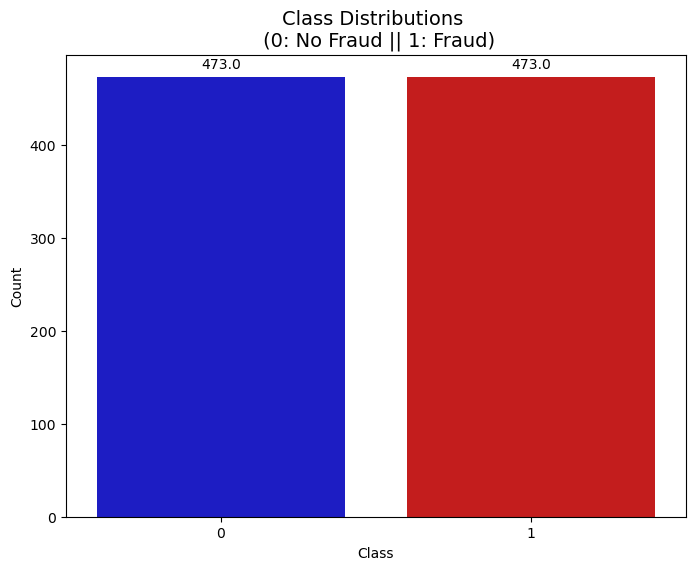

In [29]:
# The colours to be used in the count plot is defined
colors = ["#0101DF", "#DF0101"]

# The count plot is created
plt.figure(figsize=(8, 6)) # The size of the figure is initiated
ax = sns.countplot(x='Class', data=new_fraud_dataset, palette=colors) # The count plot for the new Class column for the new_fraud_dataset is created with the colours defined above 

# The annotations are added
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ','), # The height of the bar is annoted as a string with the commas
        (p.get_x() + p.get_width() / 2., p.get_height()), # The position of the annotation is set
        ha='center', va='center', # The annotation is aligned to the center
        xytext=(0, 9), # The annotations is offsetted with 9 points vertically
        textcoords='offset points' # The offset points thus created is used for the text coordinates
    )

plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14) # The title of the plot is set
plt.xlabel('Class') # The x-label to be used is set
plt.ylabel('Count') # The y-label to be used is set
plt.show() # The plot is displayed

# Dataset preperation for training and testing using Machine Learning Classifiers

This part of the code is used to separate the features (input variables) and the target variable (output) to form the new_fraud_dataset.

In [30]:
# To separate the features (x) from the target variable (y) from the new_fraud_dataset

# The Class column has been dropped from the dataset to get the features
X = new_fraud_dataset.drop('Class', axis = 1)

# The class column has been retrieved as the target variable
y= new_fraud_dataset['Class']

This part of the code splits the data into training and testing sets which will be used in the machine learning algorithms

In [31]:
# The new_fraud_dataset is split into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # 20% of the data will be used for testing and the random seed has been set for ease of reproducability 

# Using Logistic Regression, Decision Tree, Random Forest and Support Vector Machine Classifiers for training and testing

I have used the same 4 machine learning algorithms that we have discussed about earlier which include logistic regression, decision tree, random forest and support vector machine.

In [32]:
# A dictionary of classifiers have been defined 
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
     "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Machine": SVC()

}

# I have iterated over each classifier in the dictionary
for name, clf in classifier.items():
    print(f"\n=========={name}===========") # The name of the machine learning classifier is printed
    clf.fit(X_train, y_train) # The classifier is fitted to the training data
    y_pred = clf.predict(X_test) # The labels of the test data is predicted
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}") # The accuracy scores are printed
    print(f"\n Precision: {precision_score(y_test, y_pred)}") # The precision scores are printed
    print(f"\n Recall: {recall_score(y_test, y_pred)}") # The recall scores are printed
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}") # The f1-score scores are printed


==========Logistic Regression===========

 Accuaracy: 0.9368421052631579

 Precision: 0.9591836734693877

 Recall: 0.9215686274509803

 F1 Score: 0.94

==========Decision Tree Classifier===========

 Accuaracy: 0.9105263157894737

 Precision: 0.912621359223301

 Recall: 0.9215686274509803

 F1 Score: 0.9170731707317074

==========Random Forest Classifier===========

 Accuaracy: 0.9315789473684211

 Precision: 0.968421052631579

 Recall: 0.9019607843137255

 F1 Score: 0.934010152284264

==========Support Vector Machine===========

 Accuaracy: 0.9157894736842105

 Precision: 0.9574468085106383

 Recall: 0.8823529411764706

 F1 Score: 0.9183673469387755


# Statistical Analysis to know which Classifier is the Best

In this part of the code I have done a statistical analysis to identify which classifier performs the best according the performance metrics as a credit card fraud detection system.

In [33]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize a dictionary to store the results
results = {
    "Model": [], # The name of the model gets stored 
    "Accuracy": [], # The accuracy scores of each model is stored
    "Precision": [], # The precision scores of each model is stored
    "Recall": [], # The recall scores of each model is stored
    "F1 Score": [] # The f1-scores of each model is stored
}

# Iterate over each classifier in the dictionary
# The 'classifier' is used as a dictionary whose keys are the model names
# The values are the classifier instances
for name, clf in classifier.items():
    clf.fit(X_train, y_train)  # The classifier is fitted with the training data
    y_pred = clf.predict(X_test) # The trained model is used to predict the labels of the test data (X_test)
    
    # The name of the model as well as the corresponding evaluation metric is appended to the results dictionary
    results["Model"].append(name) # The name of the current model is added
    results["Accuracy"].append(accuracy_score(y_test, y_pred)) # The accuracy score is added
    results["Precision"].append(precision_score(y_test, y_pred)) # The precision score is added
    results["Recall"].append(recall_score(y_test, y_pred)) # The recall score is added
    results["F1 Score"].append(f1_score(y_test, y_pred)) # The f1-score score is added

# The results dictionary is converted to a pandas dataframe for ease in manupulation and display
results_df = pd.DataFrame(results)

# The results summary dataframe is printed
print("Results Summary:")
print(results_df)

# The best model for each metric is identified which is the model having the highest score for that metric
best_models = {
    "Accuracy": results_df.loc[results_df['Accuracy'].idxmax()]['Model'], # This is the model with the highest accuracy
    "Precision": results_df.loc[results_df['Precision'].idxmax()]['Model'], # This is the model with the highest precision
    "Recall": results_df.loc[results_df['Recall'].idxmax()]['Model'], # This is the model with the highest recall
    "F1 Score": results_df.loc[results_df['F1 Score'].idxmax()]['Model'] # This is the model with the highest f1-score
}

# The best model for each metric is printed
print("\nBest Models Based on Each Metric:")
for metric, model in best_models.items():
    print(f"{metric}: {model}")

# The rank of the model is calculated by calculating the mean of the rank across all metrics
results_df['Rank'] = results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].rank(ascending=False).mean(axis=1)
best_overall_model = results_df.loc[results_df['Rank'].idxmin()]['Model']

# The overall best model is printed
print(f"\nOverall Best Model: {best_overall_model}")

Results Summary:
                      Model  Accuracy  Precision    Recall  F1 Score
0       Logistic Regression  0.936842   0.959184  0.921569  0.940000
1  Decision Tree Classifier  0.900000   0.902913  0.911765  0.907317
2  Random Forest Classifier  0.926316   0.968085  0.892157  0.928571
3    Support Vector Machine  0.915789   0.957447  0.882353  0.918367

Best Models Based on Each Metric:
Accuracy: Logistic Regression
Precision: Random Forest Classifier
Recall: Logistic Regression
F1 Score: Logistic Regression

Overall Best Model: Logistic Regression


# Confusion Matrix Of Individual Classifiers

# Confusion Matrix for Logistic Regression Classifier

In this part of the code I have shown the confusion matrix for the logistic regression classifier and have also printed the true positive, true negative, false positive and false negative values.

True Positives (TP): 94
True Negatives (TN): 84
False Positives (FP): 4
False Negatives (FN): 8


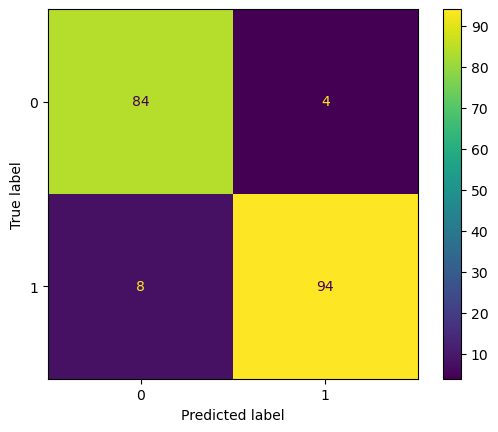

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression
clf = LogisticRegression() # A logistic Regression calssifier instance is initiated
clf.fit(X_train, y_train) # The logistic regression classifier is trained with the training data
y_pred = clf.predict(X_test) # The training model is used to predict the labels for the test data

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # The confusion matrix is computed by comparing the true labels (y_test) and the predicted labels (y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)  # A display object is created for the confusion matrix
disp.plot() # The confusion matrix is plotted by using heatmap like visualization

# Extract TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel() # The confusion matrix is falttened to extract the TN, FP,FN and TP values
print(f"True Positives (TP): {tp}") # The number of true positives is printed
print(f"True Negatives (TN): {tn}") # The number of true negatives is printed
print(f"False Positives (FP): {fp}") # The number of false positives is printed
print(f"False Negatives (FN): {fn}") # The number of false neagtives is printed

# Confusion Matrix for Decision Tree Classifier

In this part of the code I have shown the confusion matrix for the decision tree classifier and have also printed the true positive, true negative, false positive and false negative values.

True Positives (TP): 93
True Negatives (TN): 78
False Positives (FP): 10
False Negatives (FN): 9


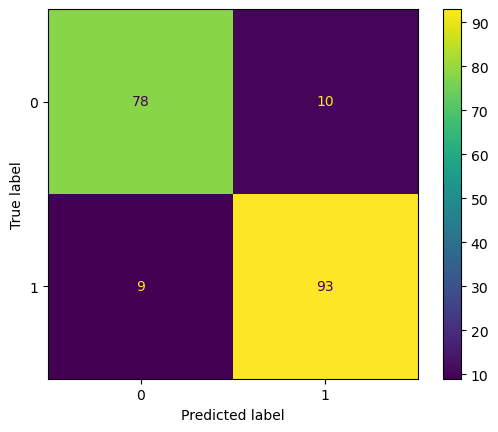

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Decision Tree Classifier
clf = DecisionTreeClassifier() # A Decision Tree calssifier instance is initiated
clf.fit(X_train, y_train) # The Decision Tree classifier is trained with the training data
y_pred = clf.predict(X_test) # The training model is used to predict the labels for the test data

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # The confusion matrix is computed by comparing the true labels (y_test) and the predicted labels (y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_) # A display object is created for the confusion matrix
disp.plot() # The confusion matrix is plotted by using heatmap like visualization

# Extract TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel() # The confusion matrix is falttened to extract the TN, FP,FN and TP values
print(f"True Positives (TP): {tp}") # The number of true positives is printed
print(f"True Negatives (TN): {tn}") # The number of true negatives is printed
print(f"False Positives (FP): {fp}") # The number of false positives is printed
print(f"False Negatives (FN): {fn}") # The number of false neagtives is printed

# Confusion Matrix for the Random Forest Classifier

In this part of the code I have shown the confusion matrix for the random forest classifier and have also printed the true positive, true negative, false positive and false negative values.

True Positives (TP): 91
True Negatives (TN): 85
False Positives (FP): 3
False Negatives (FN): 11


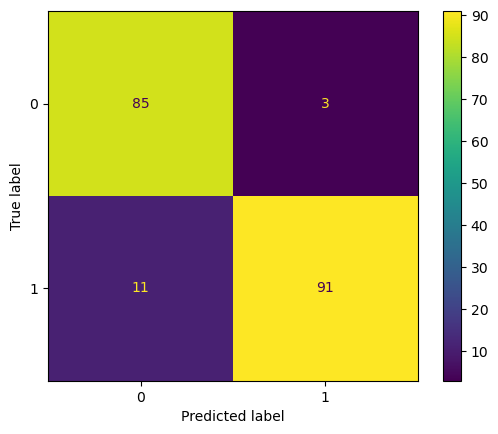

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Random Forest Classifier
clf = RandomForestClassifier() # A Random Forest calssifier instance is initiated
clf.fit(X_train, y_train) # The Random Forest classifier is trained with the training data
y_pred = clf.predict(X_test) # The training model is used to predict the labels for the test data

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # The confusion matrix is computed by comparing the true labels (y_test) and the predicted labels (y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_) # A display object is created for the confusion matrix
disp.plot() # The confusion matrix is plotted by using heatmap like visualization

# Extract TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel() # The confusion matrix is falttened to extract the TN, FP,FN and TP values
print(f"True Positives (TP): {tp}") # The number of true positives is printed
print(f"True Negatives (TN): {tn}") # The number of true negatives is printed
print(f"False Positives (FP): {fp}") # The number of false positives is printed
print(f"False Negatives (FN): {fn}") # The number of false neagtives is printed

# Confusion Matrix for the Support Vector Machine Classifier

In this part of the code I have shown the confusion matrix for the support vector machine classifier and have also printed the true positive, true negative, false positive and false negative values.

True Positives (TP): 90
True Negatives (TN): 84
False Positives (FP): 4
False Negatives (FN): 12


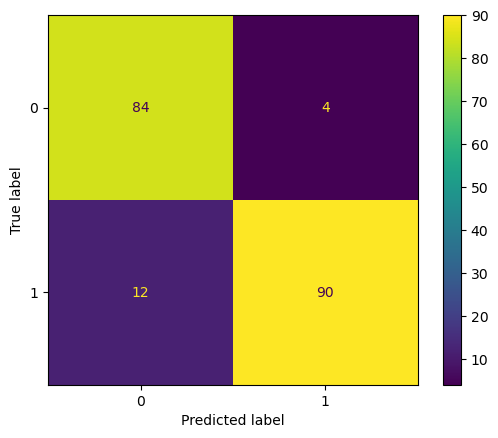

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Support Vector Machine
clf = SVC() # A Support Vector Machine calssifier instance is initiated
clf.fit(X_train, y_train) # The Support Vector Machine classifier is trained with the training data
y_pred = clf.predict(X_test) # The training model is used to predict the labels for the test data

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # The confusion matrix is computed by comparing the true labels (y_test) and the predicted labels (y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_) # A display object is created for the confusion matrix
disp.plot() # The confusion matrix is plotted by using heatmap like visualization

# Extract TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel() # The confusion matrix is falttened to extract the TN, FP,FN and TP values
print(f"True Positives (TP): {tp}") # The number of true positives is printed
print(f"True Negatives (TN): {tn}") # The number of true negatives is printed
print(f"False Positives (FP): {fp}") # The number of false positives is printed
print(f"False Negatives (FN): {fn}") # The number of false neagtives is printed